In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
import copy as cp

# Self-created Functions: 
import runLDA as rlda   # .py code with function to run LDA and generate plots

%matplotlib inline
pd.options.display.max_columns=100

In [10]:
df = pd.read_pickle('tf_idf.pkl')
fulldf = pd.read_json('train.json')

### Standardize Data (mean=0, std=0)


In [72]:
ingredientList = sorted(list(set([ingredient for i in range(data.shape[0]) for ingredient in data.loc[i,'ingredients']])))

df_sd = cp.deepcopy(df)
df_sd = StandardScaler().fit_transform(df)
df_sd = pd.DataFrame(df_sd, columns=ingredientList)
type(df_sd)
df_sd.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,1% low-fat milk,"2 1/2 to 3 lb. chicken, cut into serving pieces",2% low fat cheddar chees,2% low-fat cottage cheese,2% lowfat greek yogurt,2% milk shredded mozzarella cheese,2% reduced-fat milk,25% less sodium chicken broth,33% less sodium cooked deli ham,33% less sodium cooked ham,33% less sodium ham,33% less sodium smoked fully cooked ham,40% less sodium taco seasoning,40% less sodium taco seasoning mix,7 Up,"8 ounc ziti pasta, cook and drain",95% lean ground beef,A Taste of Thai Rice Noodles,Accent Seasoning,Adobo All Purpose Seasoning,Alaskan king crab legs,Alexia Waffle Fries,Alfredo sauce,Amarena cherries,Amaretti Cookies,American cheese,Anaheim chile,Angostura bitters,Argo Corn Starch,Asian chili sauce,Asian sweet chili sauce,Azteca Flour Tortillas,BACARDI® Mixers Margarita Mix,BACARDI® Superior,BREAKSTONE'S Sour Cream,Baileys Irish Cream Liqueur,Balsamico Bianco,Barilla Linguine,Barilla Oven-Ready Lasagne,Barilla Plus Pasta,...,yellow chives,yellow corn,yellow corn meal,yellow crookneck squash,yellow curry paste,yellow food coloring,yellow heirloom tomatoes,yellow hominy,yellow lentils,yellow miso,yellow mustard,yellow mustard seeds,yellow onion,yellow peas,yellow peppers,yellow rice,yellow rock sugar,yellow split peas,yellow squash,yellow summer squash,yellow tomato,yellowfin,yellowfin tuna,yellowtail,yellowtail snapper fillets,yoghurt,yoghurt natural low fat,yogurt cheese,yogurt dressing,yogurt low fat,yolk,yoplait,young coconut meat,young leeks,young nettle,yu choy,yuca,yucca,yucca root,yukon gold,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,-0.015741,-0.014184,-0.008527,-0.006397,-0.006922,-0.008188,-0.008553,-0.009919,-0.00691,-0.016648,-0.063367,-0.006784,-0.005014,-0.011613,-0.006995,-0.005014,-0.037001,-0.008527,-0.005014,-0.005014,-0.008605,-0.005014,-0.012821,-0.011186,-0.009674,-0.005014,-0.009398,-0.005014,-0.012159,-0.005014,-0.007091,-0.005014,-0.032131,-0.005014,-0.016116,-0.026651,-0.032708,-0.017243,-0.005014,-0.008614,-0.005014,-0.005014,-0.005014,-0.005014,-0.005014,-0.015472,-0.012184,-0.005014,-0.007082,-0.005014,...,-0.012166,-0.022186,-0.084630,-0.014354,-0.015991,-0.020357,-0.005014,-0.015022,-0.017729,-0.02126,-0.030999,-0.027462,-0.163386,-0.007083,-0.033884,-0.013132,-0.017555,-0.0243,-0.049999,-0.014625,-0.012434,-0.005014,-0.00848,-0.005014,-0.005014,-0.068215,-0.005014,-0.006983,-0.005014,-0.005014,-0.018337,-0.005014,-0.006029,-0.005014,-0.005014,-0.00856,-0.007268,-0.008464,-0.005014,-0.012965,-0.06612,-0.010746,-0.008288,-0.00697,-0.015419,-0.019113,-0.014451,-0.024915,-0.139033,-0.007091
1,-0.015741,-0.014184,-0.008527,-0.006397,-0.006922,-0.008188,-0.008553,-0.009919,-0.00691,-0.016648,-0.063367,-0.006784,-0.005014,-0.011613,-0.006995,-0.005014,-0.037001,-0.008527,-0.005014,-0.005014,-0.008605,-0.005014,-0.012821,-0.011186,-0.009674,-0.005014,-0.009398,-0.005014,-0.012159,-0.005014,-0.007091,-0.005014,-0.032131,-0.005014,-0.016116,-0.026651,-0.032708,-0.017243,-0.005014,-0.008614,-0.005014,-0.005014,-0.005014,-0.005014,-0.005014,-0.015472,-0.012184,-0.005014,-0.007082,-0.005014,...,-0.012166,-0.022186,8.932364,-0.014354,-0.015991,-0.020357,-0.005014,-0.015022,-0.017729,-0.02126,-0.030999,-0.027462,-0.163386,-0.007083,-0.033884,-0.013132,-0.017555,-0.0243,-0.049999,-0.014625,-0.012434,-0.005014,-0.00848,-0.005014,-0.005014,-0.068215,-0.005014,-0.006983,-0.005014,-0.005014,-0.018337,-0.005014,-0.006029,-0.005014,-0.005014,-0.00856,-0.007268,-0.008464,-0.005014,-0.012965,-0.06612,-0.010746,-0.008288,-0.00697,-0.015419,-0.019113,-0.014451,-0.024915,-0.139033,-0.007091
2,-0.015741,-0.014184,-0.008527,-0.006397,-0.006922,-0.008188,-0.00

### Run PCA
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

n=3 PCs seem to have the highest LL, but only by .001 ... so not by much


n_components =  2 ==============================
Log-likelihood: -9416.371684618034
Average LL per data point:  -1.1837048000776913
BIC: 18850.706481117613
Average BIC per data point:  2.3696676909010197
n_components =  3 ==============================
Log-likelihood: -9415.486873151212
Average LL per data point:  -1.1835935729919815
BIC: 18857.91841412474
Average BIC per data point:  2.3705742821024183
n_components =  4 ==============================
Log-likelihood: -9415.647843165376
Average LL per data point:  -1.1836138080660434
BIC: 18867.22191009384
Average BIC per data point:  2.371743797623361
n_components =  5 ==============================
Log-likelihood: -9416.195465264678
Average LL per data point:  -1.183682648053385
BIC: 18877.298710233215
Average BIC per data point:  2.373010522970863
n_components =  6 ==============================
Log-likelihood: -9415.972730552197
Average LL per data point:  -1.1836546487180637
BIC: 18885.834796749026
Average BIC per data point:  2.37

KeyboardInterrupt: 

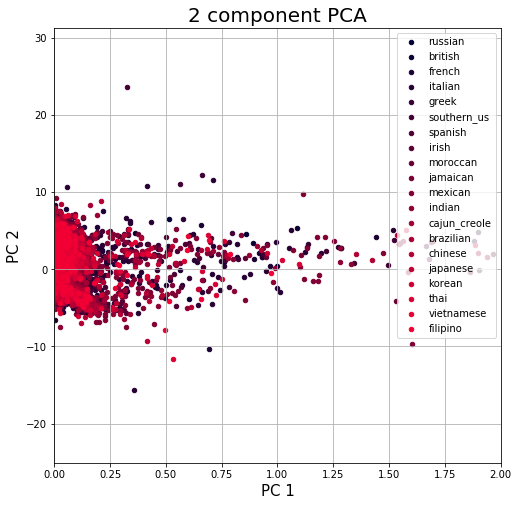

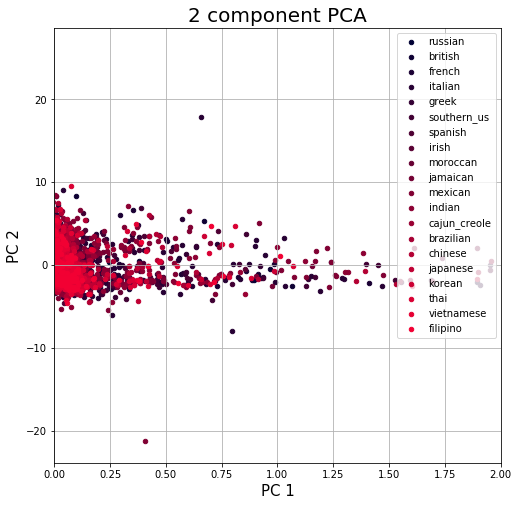

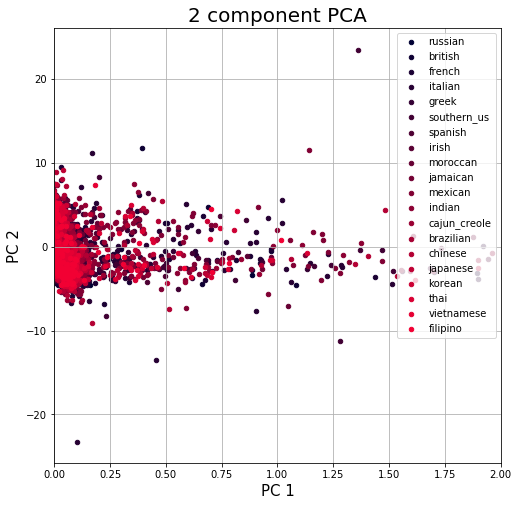

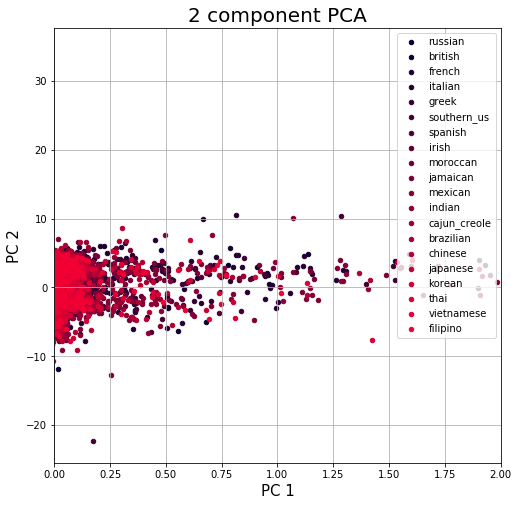

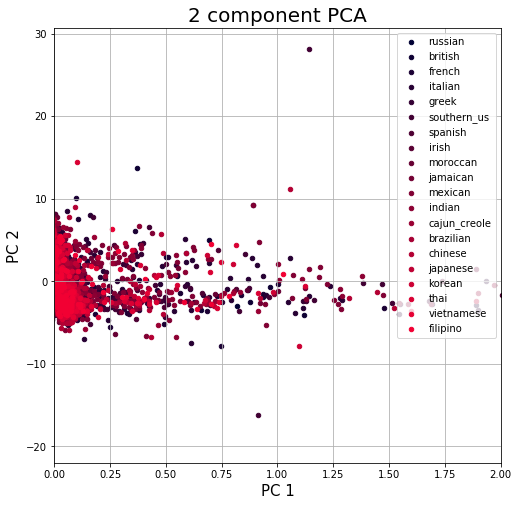

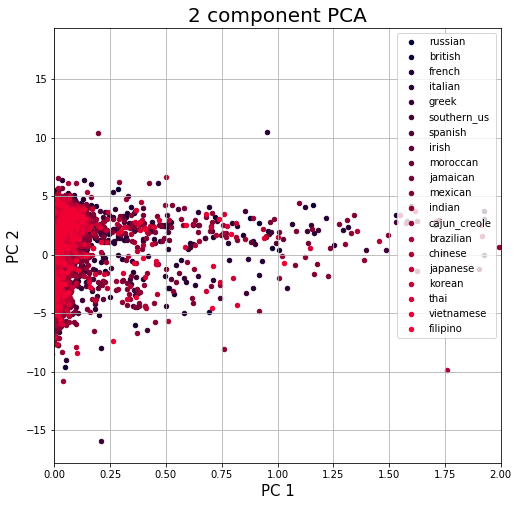

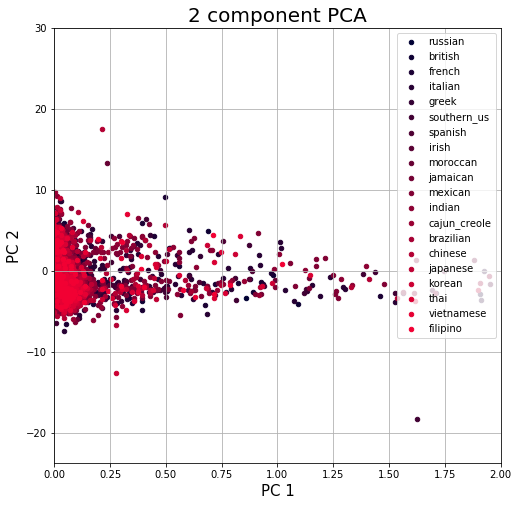

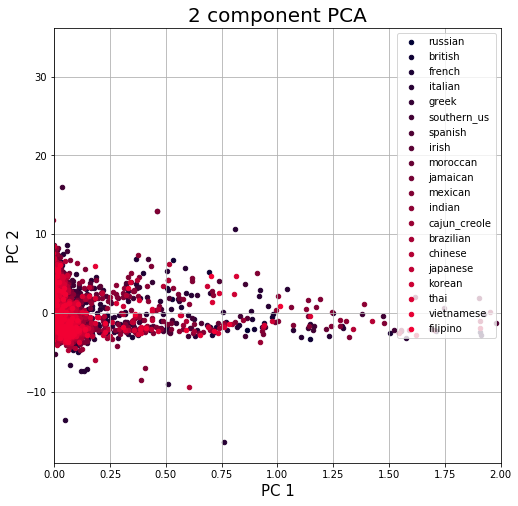

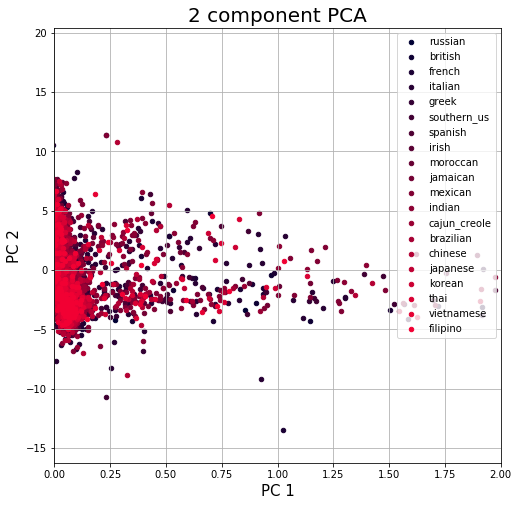

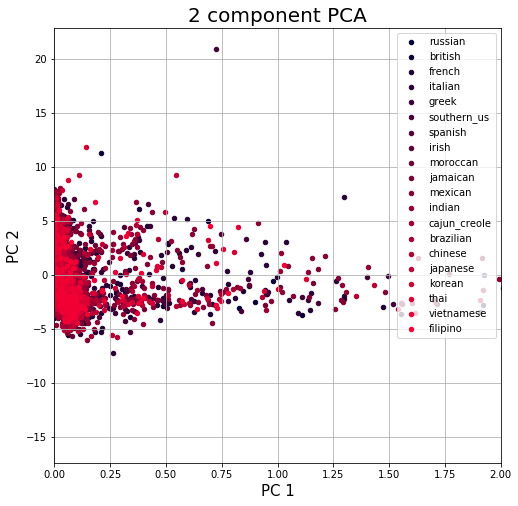

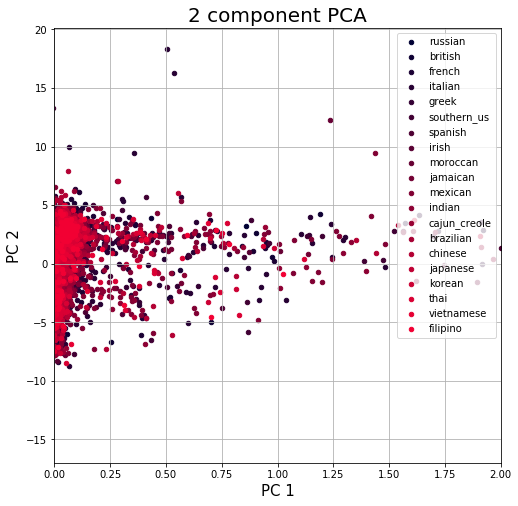

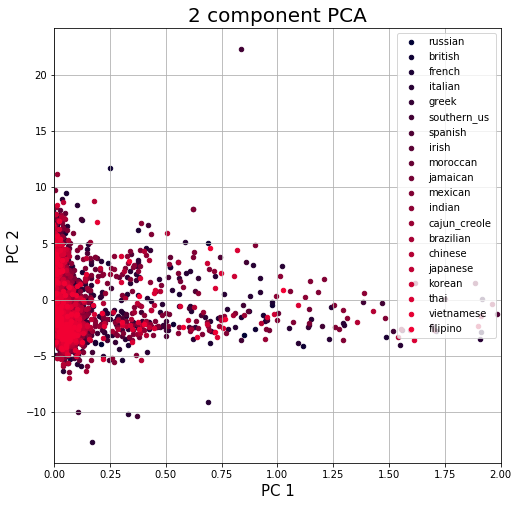

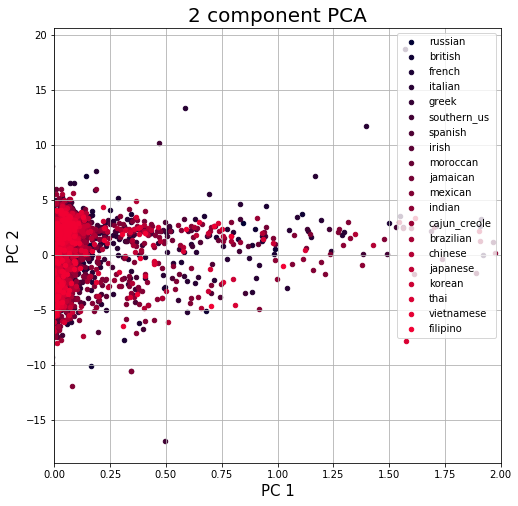

In [80]:
def getLL(df,model):
    LL = model.score(df.values)
    LLmean = LL/df.shape[0]
    print("Log-likelihood:", LL)
    print("Average LL per data point: ", LLmean)
    return LL, LLmean

def getBIC(LL,k,n):
    '''
    Returns BIC value, give LL
    k = number of parameters
    n = number of samples
    '''
    bic = k*math.log(n) - 2*LL
    print("BIC:", bic)
    print("Average BIC per data point: ", bic/n)    
    return bic

def splitTrainingTesting(X):
    df_test = X.sample(frac=.2, random_state=3) 
    df_train = X.drop(df_test.index)
    return df_test, df_train

def plotPCA(principalDf, fulldf):
    finalDf = pd.concat([principalDf, fulldf['cuisine']], axis=1)
    finalDf.head()
    cuisineList = fulldf['cuisine'].unique()
    cuisineList = ['russian','british','french','italian','greek','southern_us',
              'spanish','irish',
              'moroccan','jamaican','mexican','indian','cajun_creole','brazilian',
              'chinese','japanese','korean',
              'thai','vietnamese','filipino',
              ]
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('PC 1', fontsize = 15)
    ax.set_ylabel('PC 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = cuisineList
    #colors = ['r', 'g', 'b']
    colors = []
    for i in range(len(targets)):
        colors.append([(i/len(targets), 0, .2)])
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['cuisine'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 20)
    ax.legend(targets)
    ax.grid()
    plt.xlim(0, 2)    

def analyzePCA(df,fulldf,n_pcs):
    df_test, df_train = splitTrainingTesting(df)
    pca = PCA(n_components=n_pcs)
    principalComponents = pca.fit_transform(df_train)
    colName = []
    for i in range(principalComponents.shape[1]):
        colName.append('PC ' + str(i+1))
    principalDf = pd.DataFrame(data = principalComponents, columns = colName)
    
    # Get performance
    LL, LLmean = getLL(df_test,pca)
    getBIC(LL, n_pcs, len(df_test))
    
    # Plot PCA
    plotPCA(principalDf, fulldf)
    return principalDf
    
for i in range(2,20):
    print('n_components = ', str(i), '='*30)
    analyzePCA(df_sd,fulldf,i)    


In [86]:
# K-means clustering

import pylab as pl
from sklearn.cluster import KMeans


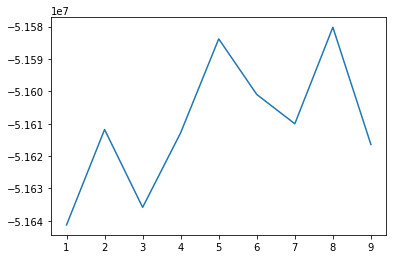

In [87]:
df_test, df_train = splitTrainingTesting(df_sd)
    
Nc = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(df_train).score(df_test) for i in range(len(kmeans))]

pl.plot(Nc,score)

CPU times: user 1h 18min 48s, sys: 2min 54s, total: 1h 21min 42s
Wall time: 35min 2s


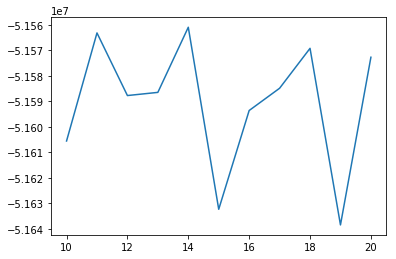

In [88]:
%%time
Nc = range(10,21)
kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

score = [kmeans[i].fit(df_train).score(df_test) for i in range(len(kmeans))]

pl.plot(Nc,score)

[]